# Malignant-Comments-Classifier

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns

In [2]:
import numpy as np

In [3]:
import neattext as nt
import neattext.functions as nfx

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [6]:
df =  pd.read_csv('train.csv')  #reading the dataset

In [47]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [17]:
df['comment_text'].apply(lambda x:nt.TextFrame(x).noise_scan())     #noise present in the comment text

0         {'text_noise': 11.742424242424242, 'text_lengt...
1         {'text_noise': 12.5, 'text_length': 112, 'nois...
2         {'text_noise': 12.017167381974248, 'text_lengt...
3         {'text_noise': 13.183279742765272, 'text_lengt...
4         {'text_noise': 14.925373134328357, 'text_lengt...
                                ...                        
159566    {'text_noise': 13.559322033898304, 'text_lengt...
159567    {'text_noise': 16.161616161616163, 'text_lengt...
159568    {'text_noise': 7.4074074074074066, 'text_lengt...
159569    {'text_noise': 15.517241379310345, 'text_lengt...
159570    {'text_noise': 15.343915343915343, 'text_lengt...
Name: comment_text, Length: 159571, dtype: object

In [23]:
print(df.isnull().sum())

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
comment_textnew     0
dtype: int64


In [5]:
df['comment_text_noise'] = df['comment_text'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())

In [6]:
df['comment_text_noise']   #extracted the stopwords from the comment text

0         [why, the, made, under, my, were, they, weren'...
1                                                [he, this]
2         [really, not, to, it's, just, that, this, is, ...
3         [more, i, make, any, on, i, if, the, should, b...
4                                 [are, my, any, you, what]
                                ...                        
159566    [for, the, of, when, your, the, in, why, shoul...
159567    [you, should, be, of, yourself, that, is, a, y...
159568                                            [no, for]
159569    [and, it, it, was, you, who, put, on, the, to,...
159570    [and, i, really, don't, you, i, here, and, my,...
Name: comment_text_noise, Length: 159571, dtype: object

Data cleaning

In [7]:
df['comment_textnew'] = df['comment_text'].apply(nfx.remove_stopwords) #removing stopwords

In [8]:
#removing punctuation , special character and urls
df['comment_textnew'] = df['comment_textnew'].apply(nfx.remove_punctuations)
df['comment_textnew'] = df['comment_textnew'].apply(nfx.remove_special_characters)
df['comment_textnew'] = df['comment_textnew'].apply(nfx.remove_phone_numbers)
df['comment_textnew'] = df['comment_textnew'].apply(nfx.remove_urls)

# Data Analysis

<AxesSubplot:xlabel='malignant', ylabel='count'>

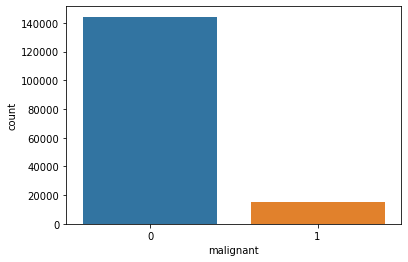

In [20]:
sns.countplot(df['malignant'])

In [4]:
df['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

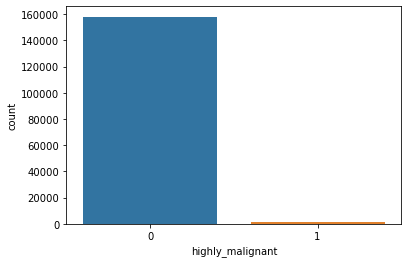

In [21]:
sns.countplot(df['highly_malignant'])

In [5]:
df['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

<AxesSubplot:xlabel='rude', ylabel='count'>

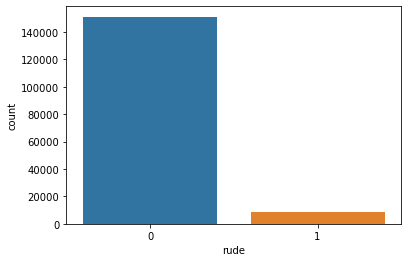

In [22]:
sns.countplot(df['rude'])

In [6]:
df['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

<AxesSubplot:xlabel='threat', ylabel='count'>

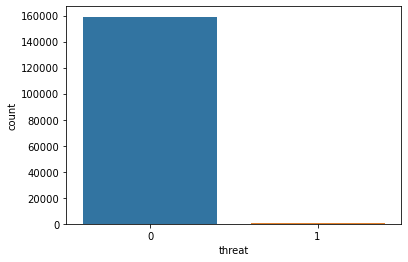

In [23]:
sns.countplot(df['threat'])

In [7]:
df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

<AxesSubplot:xlabel='abuse', ylabel='count'>

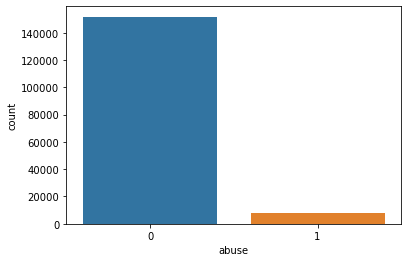

In [24]:
sns.countplot(df['abuse'])

In [8]:
df['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

<AxesSubplot:xlabel='loathe', ylabel='count'>

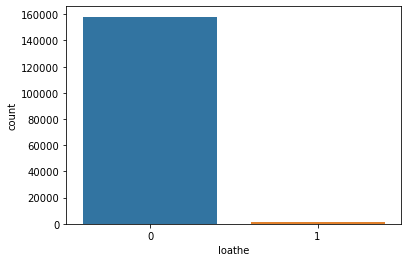

In [25]:
sns.countplot(df['loathe'])

In [9]:
df['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

For each of the label(though it is multi label classification analysing each seperately)
Each label is unbalanced and zeros are outnumbered compared to one for each label

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

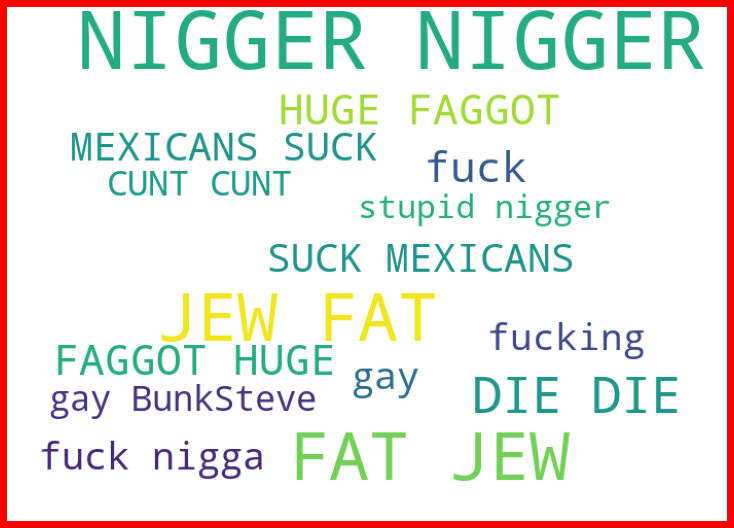

In [27]:

loathe = df['comment_text'][df['loathe']==1]

loathe_cloud = WordCloud(width=700,height=500,background_color='white',max_words=15).generate(' '.join(loathe))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(loathe_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

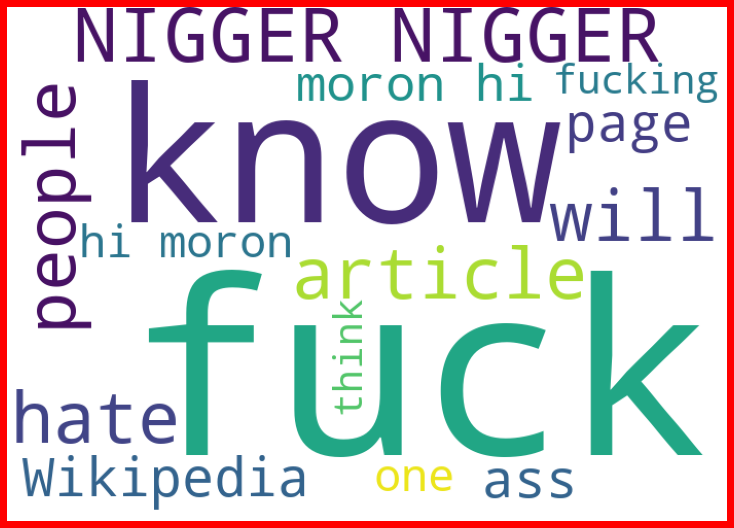

In [28]:

malignant = df['comment_text'][df['malignant']==1]

malignant_cloud = WordCloud(width=700,height=500,background_color='white',max_words=15).generate(' '.join(malignant))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

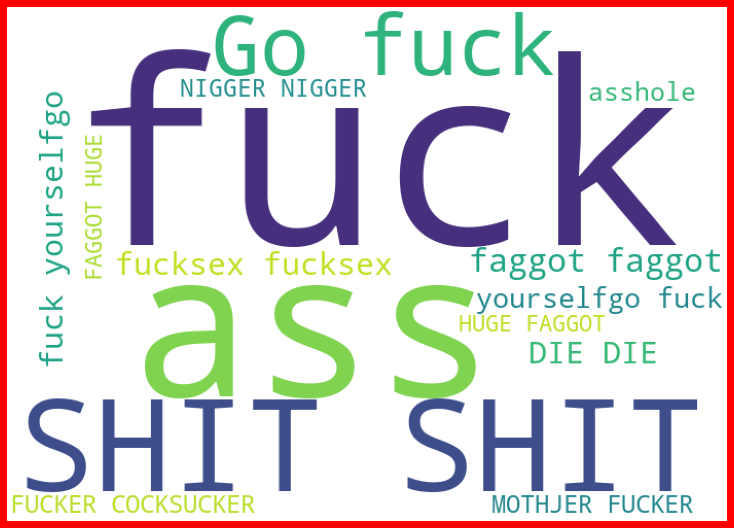

In [29]:

highly_malig = df['comment_text'][df['highly_malignant']==1]

hmali_cloud = WordCloud(width=700,height=500,background_color='white',max_words=15).generate(' '.join(highly_malig))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(hmali_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

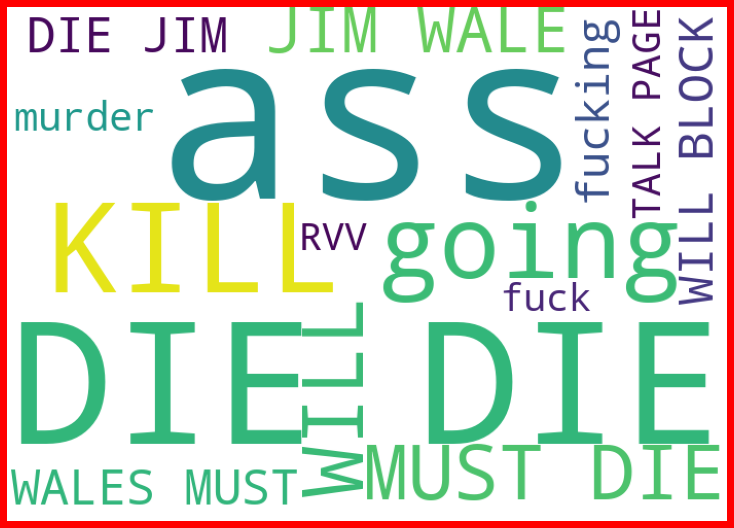

In [30]:

threat = df['comment_text'][df['threat']==1]

threat_cloud = WordCloud(width=700,height=500,background_color='white',max_words=15).generate(' '.join(threat))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(threat_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

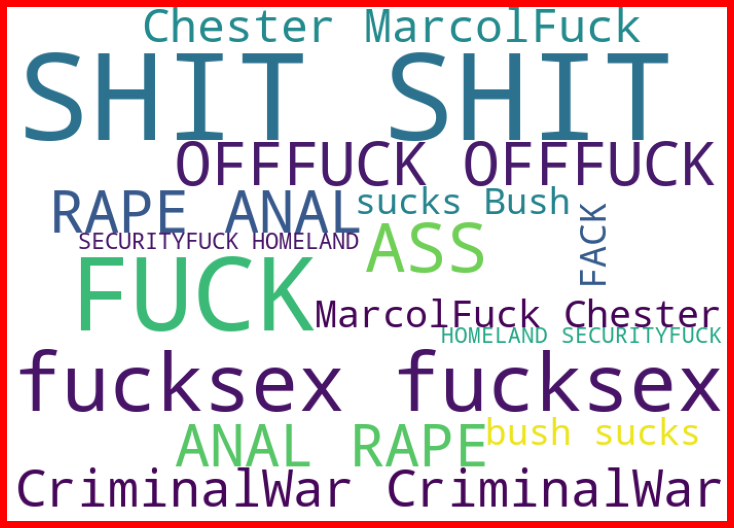

In [31]:

highly_malig = df['comment_text'][df['highly_malignant']==1][df['abuse']==0]

hmali_cloud = WordCloud(width=700,height=500,background_color='white',max_words=15).generate(' '.join(highly_malig))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(hmali_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

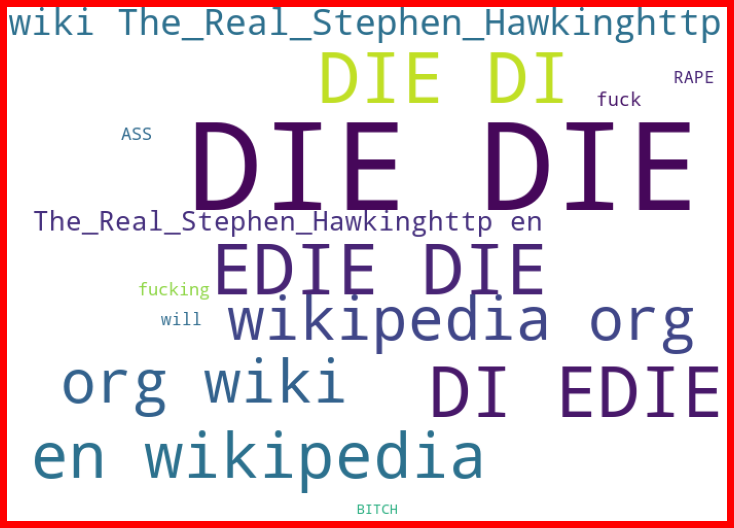

In [32]:
all_one = df['comment_text'][df['highly_malignant']==1][df['abuse']==1][df['threat']==1][df['rude']==1][df['malignant']==1][df['loathe']==1]

all_cloud = WordCloud(width=700,height=500,background_color='white',max_words=15).generate(' '.join(all_one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(all_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

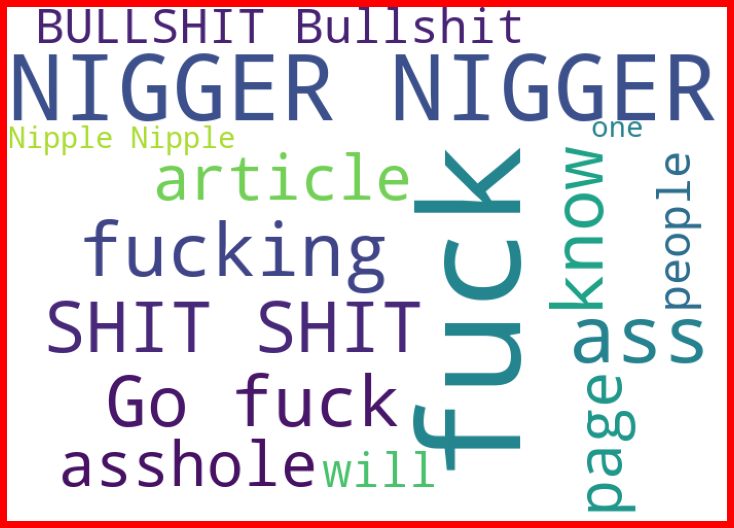

In [33]:
rude = df['comment_text'][df['rude']==1]

rudecloud = WordCloud(width=700,height=500,background_color='white',max_words=15).generate(' '.join(rude))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(rudecloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

MOst frequents words used for each label is are displayed in thw word cloud based on different label and also when all the values 
are present 

In [34]:
df['length'] = df.comment_text.str.len()
df['clean_length'] = df.comment_textnew.str.len()
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_textnew,comment_text_noise,length,clean_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation edits username Hardcore Metallica ...,"[why, the, made, under, my, were, they, weren'...",264,156
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,Daww matches background colour Im seemingly st...,"[he, this]",112,91
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Hey man Im trying edit war guy constantly remo...,"[really, not, to, it's, just, that, this, is, ...",233,131
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,cant real suggestions improvement wondered s...,"[more, i, make, any, on, i, if, the, should, b...",622,361
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,You sir hero chance remember page thats on,"[are, my, any, you, what]",67,42


Comparing the length of comments after removing the stopwords

In [9]:
df1 = df[:80000]

Model building

In [10]:
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(df1['comment_textnew'])

In [11]:
y = df1[['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']]

In [12]:
x_train,x_test,Y_train,y_test = train_test_split(features,y,test_size=0.33,random_state=42)

In [12]:
clf = OneVsRestClassifier(SVC()).fit(x_train,Y_train)

In [13]:
p = clf.predict(x_test)

In [14]:
print(accuracy_score(p,y_test))

0.9106818181818181


In [18]:
print(classification_report(p,y_test))

              precision    recall  f1-score   support

           0       0.46      0.96      0.62       615
           1       0.09      0.67      0.15        18
           2       0.51      0.95      0.67       373
           3       0.02      0.20      0.04         5
           4       0.37      0.79      0.51       307
           5       0.06      1.00      0.11         7

   micro avg       0.41      0.91      0.57      1325
   macro avg       0.25      0.76      0.35      1325
weighted avg       0.45      0.91      0.60      1325
 samples avg       0.03      0.04      0.04      1325



In [14]:
from sklearn.metrics import hamming_loss

In [21]:
print("Hamming_loss:", hamming_loss(y_test,p))

Hamming_loss: 0.02321969696969697


In [22]:
from sklearn.metrics import multilabel_confusion_matrix

In [31]:
multilabel_confusion_matrix(y_test,p)

array([[[11896,    24],
        [  689,   591]],

       [[13053,     6],
        [  129,    12]],

       [[12486,    17],
        [  341,   356]],

       [[13149,     4],
        [   46,     1]],

       [[12485,    63],
        [  408,   244]],

       [[13081,     0],
        [  112,     7]]], dtype=int64)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
clfd = OneVsRestClassifier(DecisionTreeClassifier()).fit(x_train,Y_train)

In [42]:
p1 = clfd.predict(x_test)
print("Accuracy score",accuracy_score(p1,y_test))
print("Hamming_loss:", hamming_loss(y_test,p1))

Accuracy score 0.8725757575757576
Hamming_loss: 0.03184343434343434


In [43]:
clfk = OneVsRestClassifier(KNeighborsClassifier()).fit(x_train,Y_train)
p2 = clfk.predict(x_test)
print("Accuracy score",accuracy_score(p2,y_test))
print("Hamming_loss:", hamming_loss(y_test,p2))

Accuracy score 0.8873484848484848
Hamming_loss: 0.028308080808080806


Accuracy scores of different algorithms :

SVC : 91.06
Decisiontree : 87.25
KNN : 88.73

# Binary relevance

In [13]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
classifier = BinaryRelevance(GaussianNB())
classifier.fit(x_train, Y_train)
predictions = classifier.predict(x_test)


print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.8166666666666667


# Label Powerset

In [15]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.linear_model import LogisticRegression


classifier = LabelPowerset(LogisticRegression())
classifier.fit(x_train, Y_train)
predictions = classifier.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.8825757575757576


In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Ensembe Techniques

In [15]:
rf_classifier = RandomForestClassifier(n_estimators=100)
clfrf = OneVsRestClassifier(rf_classifier).fit(x_train,Y_train)
prf = clfrf.predict(x_test)
print("Accuracy score",accuracy_score(prf,y_test))
print("Hamming_loss:", hamming_loss(y_test,prf))

Accuracy score 0.9012878787878787
Hamming_loss: 0.02851010101010101


In [16]:
grd_boost = GradientBoostingClassifier(n_estimators=100,random_state=0)

In [17]:
clfgrd = OneVsRestClassifier(grd_boost).fit(x_train,Y_train)
pgrd = clfgrd.predict(x_test)
print("Accuracy score",accuracy_score(pgrd,y_test))
print("Hamming_loss:", hamming_loss(y_test,pgrd))

Accuracy score 0.906439393939394
Hamming_loss: 0.024065656565656564


In [18]:
ada_boost = AdaBoostClassifier(n_estimators=100,random_state=0)

In [19]:
clfada = OneVsRestClassifier(ada_boost).fit(x_train,Y_train)
pada = clfada.predict(x_test)
print("Accuracy score",accuracy_score(pada,y_test))
print("Hamming_loss:", hamming_loss(y_test,pada))

Accuracy score 0.9087121212121212
Hamming_loss: 0.022626262626262626


Each ensemble technique is giving almost same accuracy score

In [8]:
df2 = df[80000:]   #building model ofr other half of model

In [9]:
tfidf = TfidfVectorizer()
features2 = tfidf.fit_transform(df2['comment_text'])

In [10]:
y = df2[['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']]

In [11]:
x_train,x_test,Y_train,y_test = train_test_split(features2,y,test_size=0.33,random_state=42)

In [12]:
clf = OneVsRestClassifier(SVC()).fit(x_train,Y_train)

In [15]:
p = clf.predict(x_test)
print("accuracy score:",accuracy_score(p,y_test))
print(classification_report(p,y_test))
print("Hamming_loss:", hamming_loss(y_test,p))

accuracy score: 0.9075757575757576
              precision    recall  f1-score   support

           0       0.26      0.99      0.41        81
           1       0.00      0.00      0.00         0
           2       0.29      0.93      0.45        56
           3       0.00      0.00      0.00         0
           4       0.21      0.78      0.32        41
           5       0.04      1.00      0.07         1

   micro avg       0.23      0.92      0.37       179
   macro avg       0.13      0.62      0.21       179
weighted avg       0.26      0.92      0.40       179
 samples avg       0.02      0.02      0.02       179

Hamming_loss: 0.02792929292929293


In [30]:
import pickle

In [17]:
malignant_comments = 'comments.pkl'
pickle.dump(clf,open(malignant_comments,'wb'))

# Importing test data

In [23]:
dftest = pd.read_csv('testmalig.csv')

In [19]:
dftest.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [22]:
print(dftest.isnull().sum())

id                 0
comment_text       0
comment_textnew    0
dtype: int64


In [45]:
dfn = df1.append(dftest)   #combining training and testing data before preprocessing


In [26]:
dfn['comment_textnew'] = dfn['comment_text'].apply(nfx.remove_stopwords) 

In [27]:
dfn['comment_textnew'] = dfn['comment_textnew'].apply(nfx.remove_punctuations)
dfn['comment_textnew'] = dfn['comment_textnew'].apply(nfx.remove_special_characters)
dfn['comment_textnew'] = dfn['comment_textnew'].apply(nfx.remove_phone_numbers)
dfn['comment_textnew'] = dfn['comment_textnew'].apply(nfx.remove_urls)

In [25]:
dftest['length'] = dftest.comment_text.str.len()
dftest['clean_length'] = dftest.comment_textnew.str.len()
dftest.head()

,id,comment_text,comment_textnew,length,clean_length
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,Yo bitch Ja Rule succesful whats hating sad mo...,367,234
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,RfC title fine is IMO,50,23
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",Sources Zawe Ashton Lapland,54,34
3,00017563c3f7919a,":If you have a look back at the source, the in...",If look source information updated correct for...,205,107
4,00017695ad8997eb,I don't anonymously edit articles at all.,anonymously edit articles all,41,29


In [35]:
y = dfn[['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']]

In [28]:
tfidf = TfidfVectorizer()
featur = tfidf.fit_transform(dfn['comment_textnew'])

In [38]:
y1=  y[:80000]   #seperating only training data for model building

In [46]:
f = featur[:80000]   #seperating features for buiding the model

In [39]:
x_train,x_test,Y_train,y_test = train_test_split(f,y1,test_size=0.33,random_state=42)


In [40]:
clf = OneVsRestClassifier(SVC()).fit(x_train,Y_train)   #fitting the data for training data

In [41]:
pred_test = clf.predict(featur[80001:])   #predicting data for test dataset

In [43]:
pdtest = pd.DataFrame(pred_test)

In [44]:
pdtest.head()

,0,1,2,3,4,5
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
